In [4]:
from sklearn.datasets import fetch_openml

In [5]:
# get mnist dataset
mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [7]:
# getting features and target variable
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

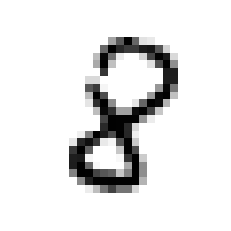

In [9]:
# see one of the image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[32000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
# let's split the dataset before moving ahead
# mnist dataset is already split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [23]:
# shuffle the training set
import numpy as np
shuffled_indices = np.random.permutation(len(X_train))
X_train, y_train = X_train[shuffled_indices], y_train[shuffled_indices]

In [24]:
# first train a binary classifier whether the digit is 8 or not
y_train_8 = (y_train == '8')
y_test_8 = (y_test == '8')

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
sgd_clf.predict([some_digit])

array([ True])

In [26]:
# measuring the performance using k fold cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.93710314, 0.9417    , 0.92669633])

In [27]:
# using confusion matrix to assess performance
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv = 3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_8, y_train_pred)

array([[52671,  1478],
       [ 2412,  3439]])

In [28]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_8, y_train_pred)

0.6994102094773236

In [29]:
recall_score(y_train_8, y_train_pred)

0.5877627755939155

In [30]:
# multiclass classification
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['8'], dtype='<U1')

In [31]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array(['8'], dtype=object)

In [32]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87547491, 0.85389269, 0.86898035])

In [33]:
# scaling the feature set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [34]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/home/dhruv/Documents/machine-learning-applications/my_env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5595,    0,   18,    7,    7,   42,   33,    5,  215,    1],
       [   0, 6414,   39,   23,    3,   47,    4,    8,  192,   12],
       [  24,   30, 5241,   95,   75,   21,   63,   35,  363,   11],
       [  27,   15,  114, 5254,    1,  194,   24,   45,  390,   67],
       [  10,   14,   39,   11, 5208,   13,   34,   23,  329,  161],
       [  26,   15,   26,  165,   50, 4468,   68,   17,  521,   65],
       [  27,   15,   45,    1,   40,   90, 5552,    5,  143,    0],
       [  21,   14,   49,   26,   49,   11,    4, 5701,  183,  207],
       [  14,   62,   44,  102,    2,  128,   30,    8, 5419,   42],
       [  25,   21,   29,   56,  120,   36,    1,  184,  363, 5114]])